In [1]:
from importlib import reload
import flymovie as fm
import cnn_models.siamese_cnn as cn
import cnn_models.evaluate_models as ev
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from importlib import reload
from sklearn.manifold import TSNE
import scipy.ndimage as ndi
import skimage as ski
%load_ext autoreload
%autoreload 2

In [15]:
def dists_arr_to_row(arr, row):
    dists_sq = np.sum((arr - row) ** 2, axis=1)
    dists = np.sqrt(dists_sq)
    return dists

def dist_to_center(ref_arr, arr):
    center = ref_arr.mean(axis=0)
    sqdist = np.sum((arr - center) ** 2, axis=1)
    return np.sqrt(sqdist)

def find_in_radius(em1, files1, em2, files2, r):
    good_files = []
    for i in range(len(files1)):
        if i % 250 == 0:
            print(i)

        dists = dists_arr_to_row(em2, em1[i])
        good_uns = dists <= r
        #good_files1 = np.array(files1)[good_uns]
        good_files_this = list(np.array(files2)[good_uns])
        good_files = good_files + good_files_this

    return np.unique(good_files)

def find_in_radius_center(em1, files1, em2, files2, r):
    good_files = []
    center = np.mean(em1, axis=0)
    for i in range(len(files2)):
        if i % 250 == 0:
            pass
            #print(i)

        dist = np.sqrt(np.sum((center - em2[i]) ** 2))
        if dist <= r:
            good_files.append(files2[i])

    return np.unique(good_files)

def d_pairwise_all(em1, em2):
    d = []
    for i in range(len(em2)):
        d_ = list(dists_arr_to_row(em1, em2[i]))
        d = d + d_
    return d

def norm(x):
    mean_ = np.mean(x[x>0])
    return x / mean_ * 1000

def make_df(files):
    p = []
    for f in files:
        #print(f.split('_')[])

        p.append(f.split('_')[1:-1])

    p = np.array(p)
    p = p.astype(float) 
    df = pd.DataFrame(p, columns=['ntotal', 'hlb_diam','hlb_nmols', 'n_clusters', 'cluster_diam_mean', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma'])
    return df[['hlb_diam','hlb_nmols', 'n_clusters', 'cluster_diam_mean', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma']]

In [ ]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-wt-early13__realreal__realreal_realsim_20220517_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-earlync13-val_UjbwPCLC__checkpoint_final_realreal__realreal_realsim_20220517_34layer.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1, files1, em2, files2, 0.8))
print(df.shape)
sn.pairplot(df)

(182, 8)


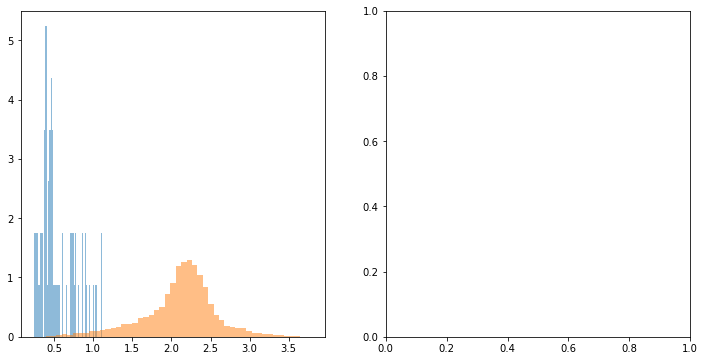

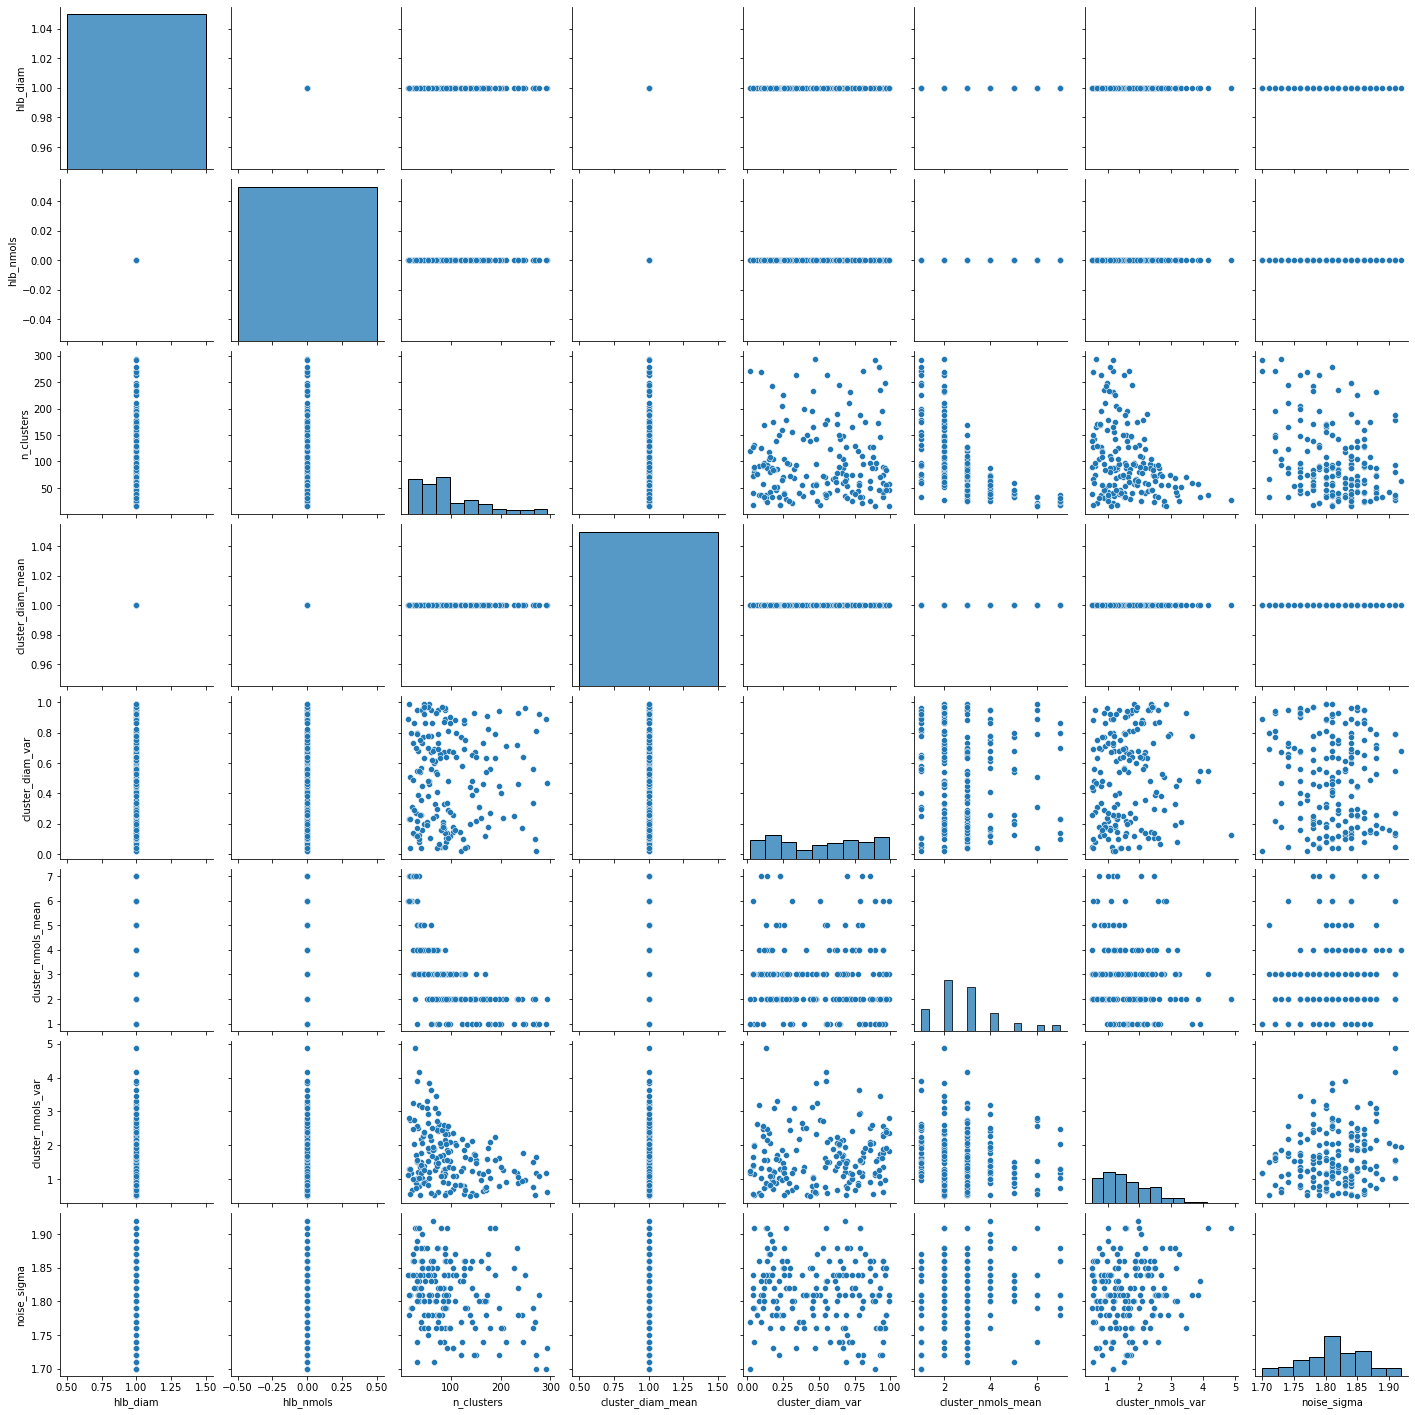

In [16]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-wt-early13__realreal__realreal_realsim_20220517_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-earlync13-val_UjbwPCLC__checkpoint_final_realreal__realreal_realsim_20220517_34layer.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1, files1, em2, files2, 0.8))
print(df.shape)
sn.pairplot(df)

0
(385, 9)


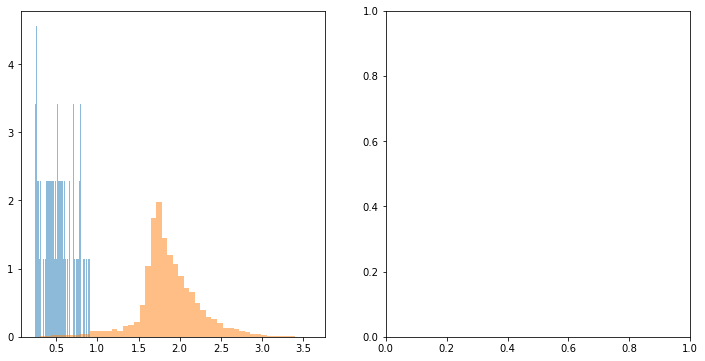

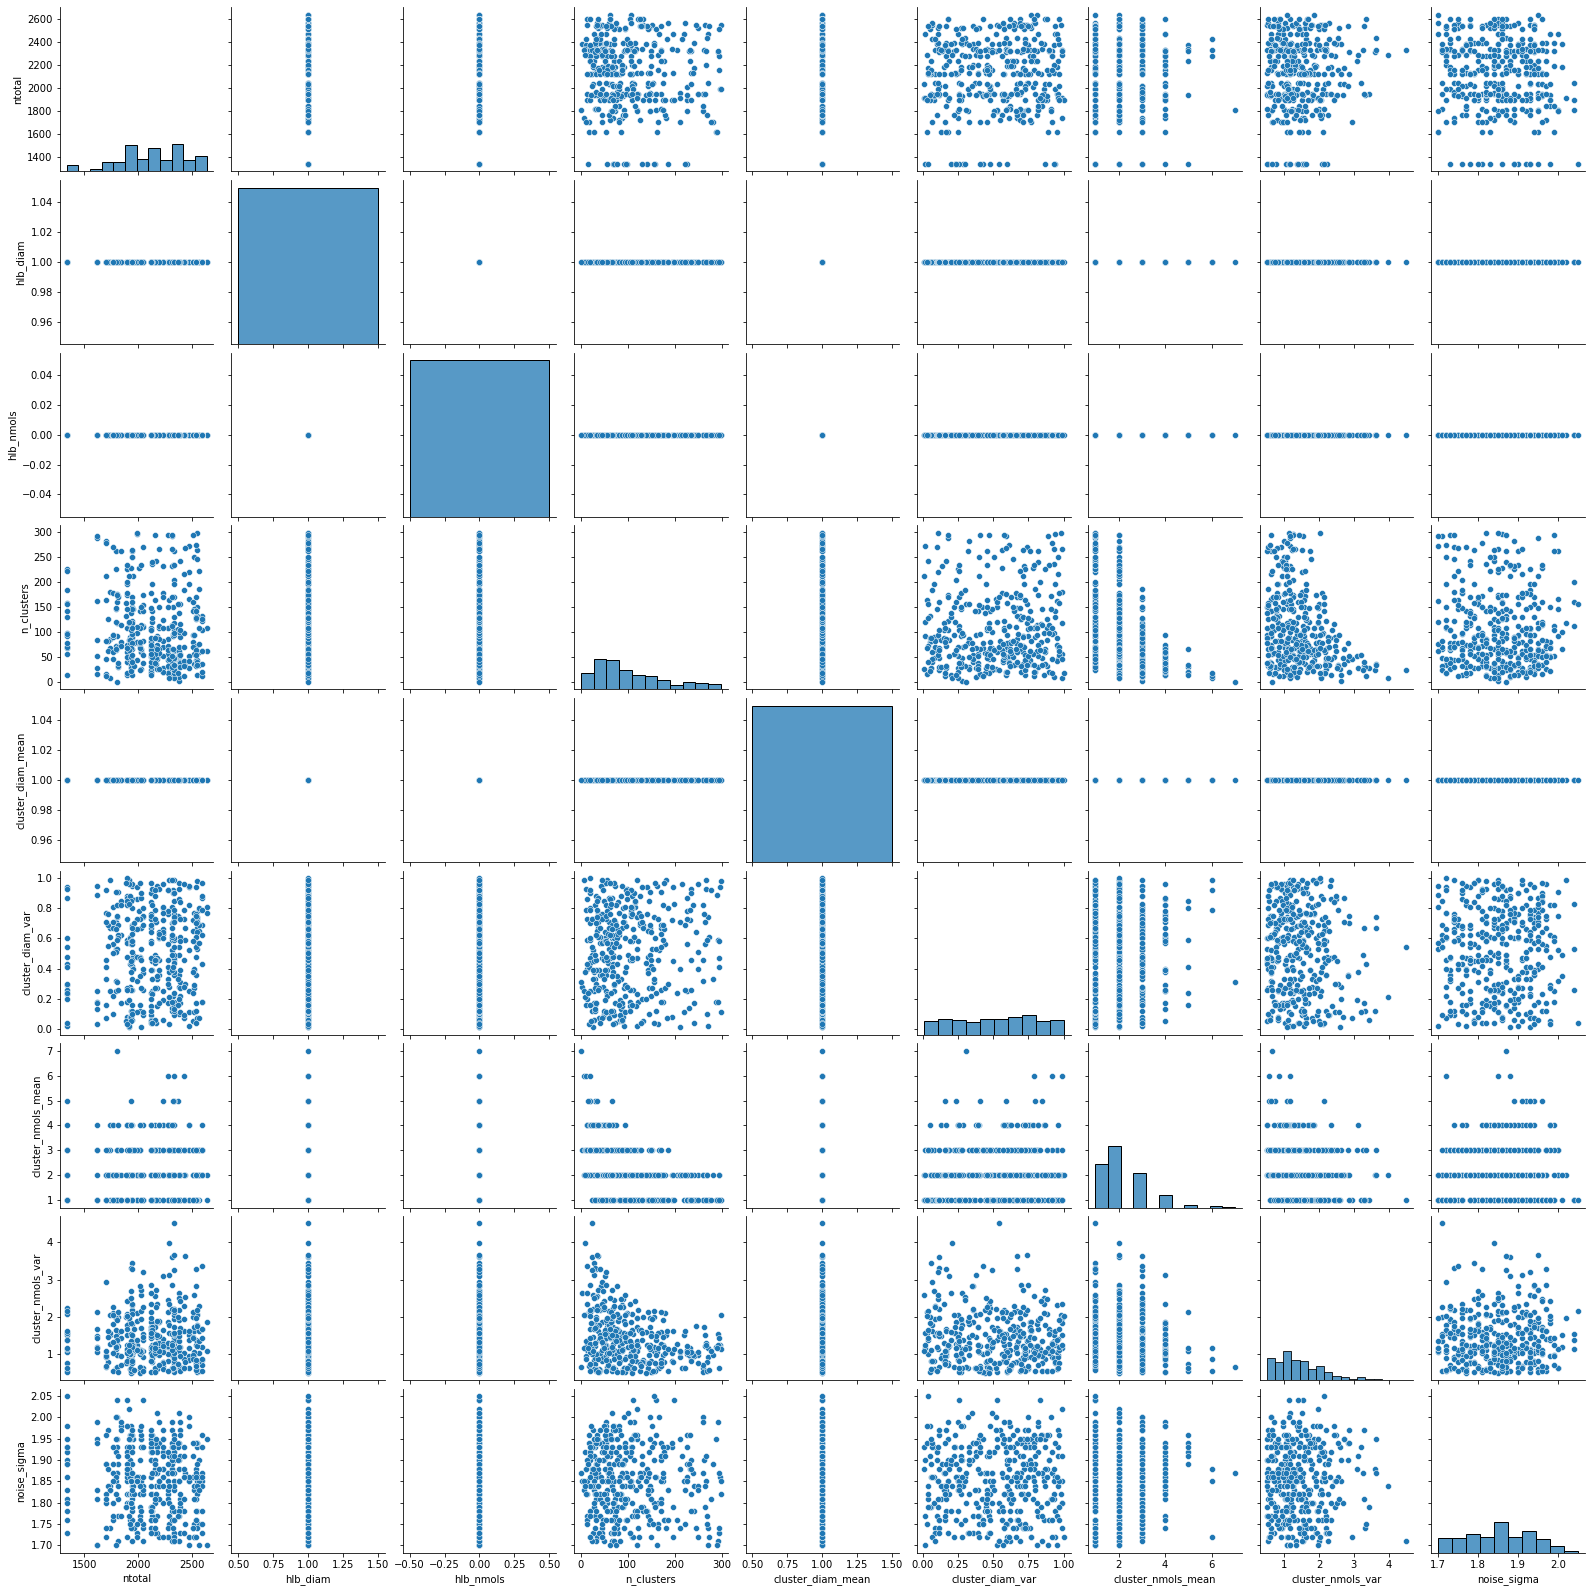

In [18]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-wt-early13__realreal__realreal_realsim_20220517_34layer_2xtrain.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-earlync13-val_UjbwPCLC__checkpoint_final_realreal__realreal_realsim_20220517_34layer_2xtrain.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius(em1, files1, em2, files2, 0.6))
print(df.shape)
sn.pairplot(df)

(509, 9)


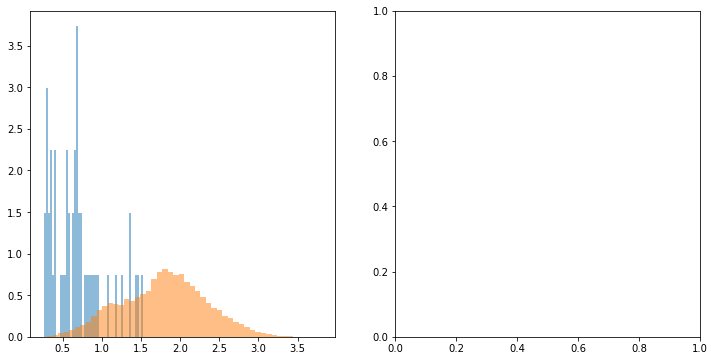

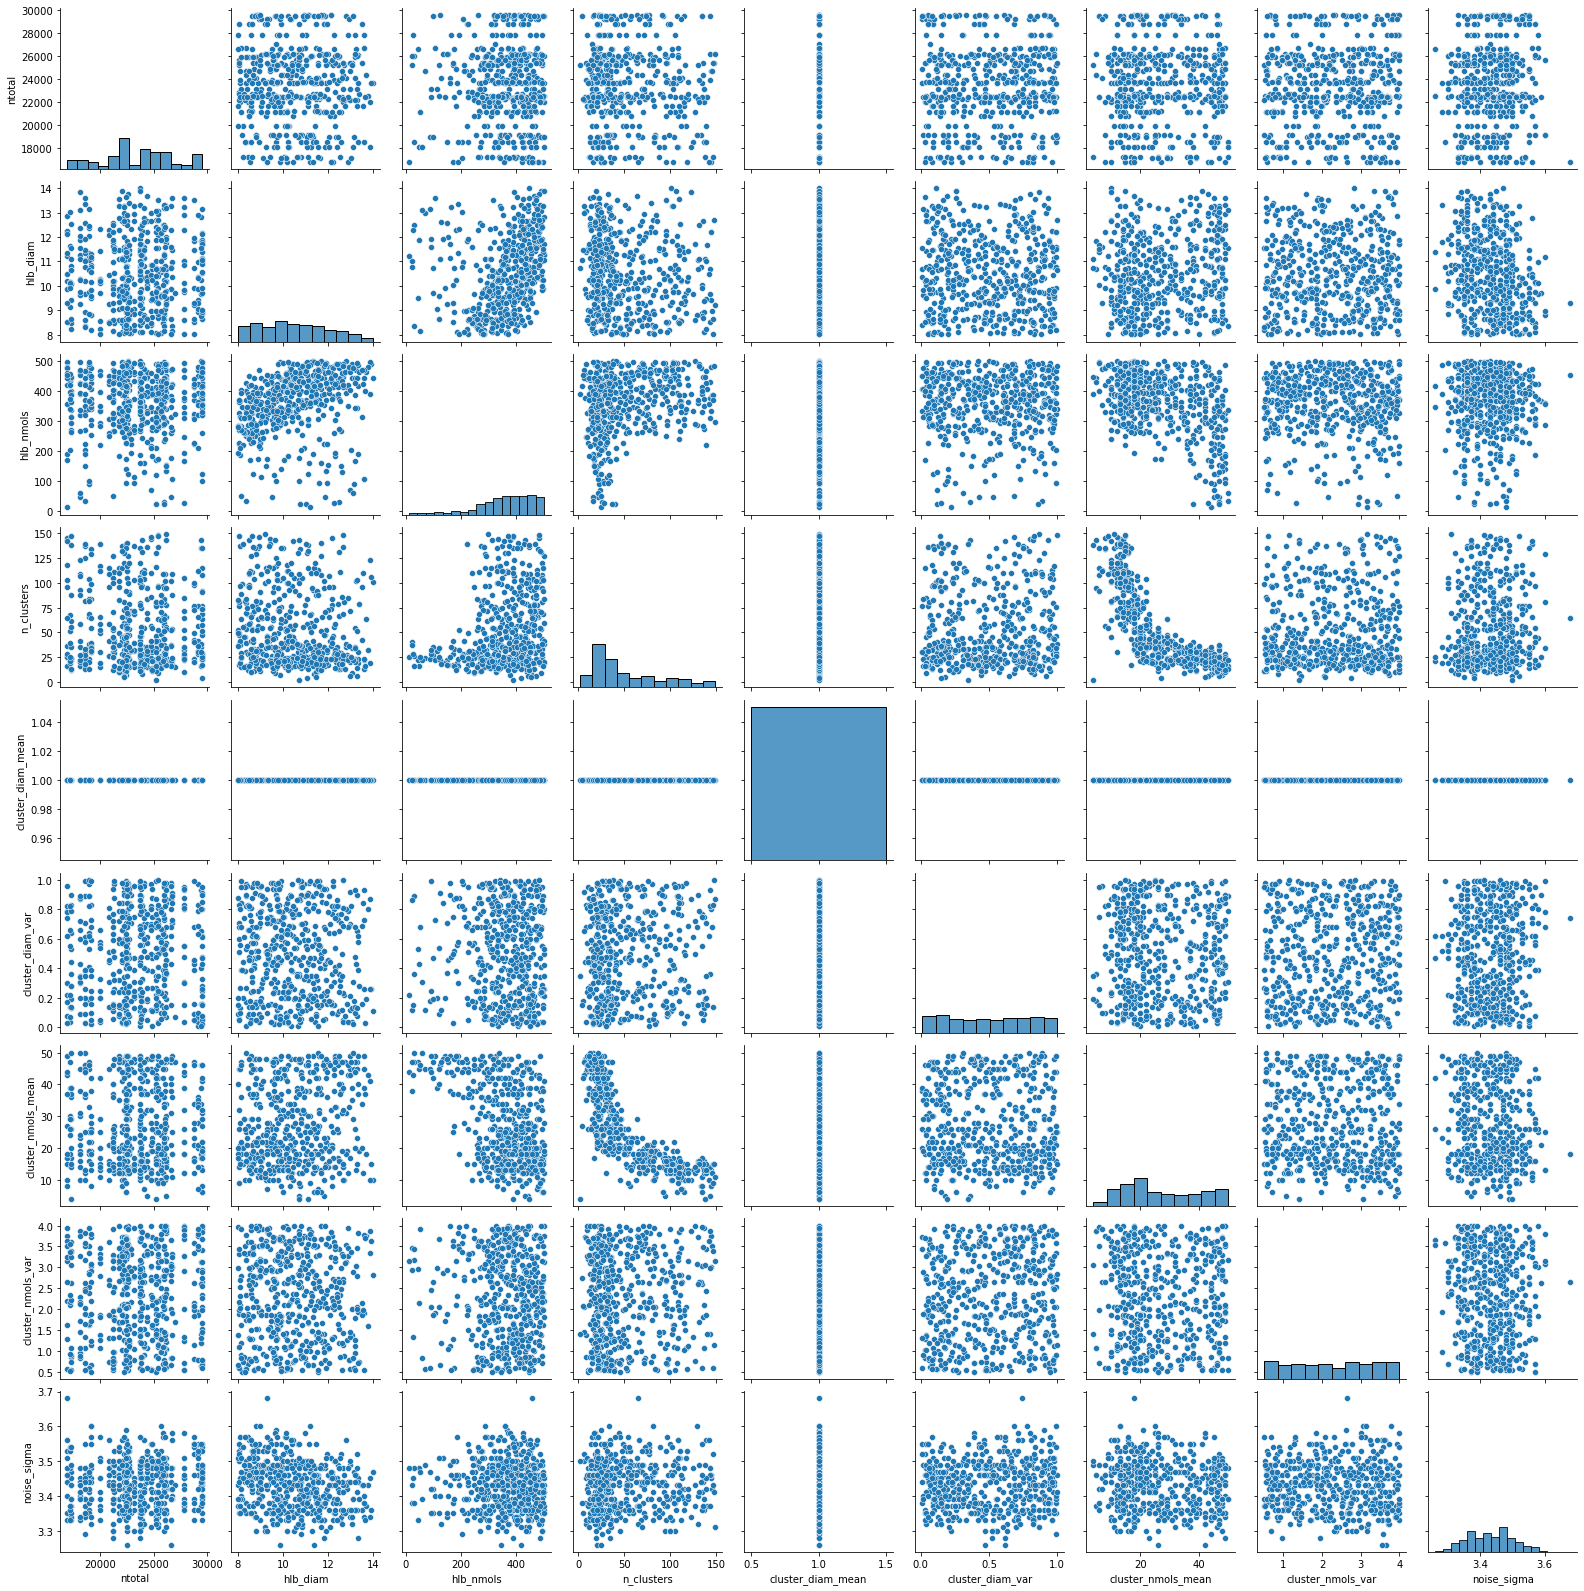

In [13]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-2__realreal__realreal_realsim_20220517_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-val_pjOKQDXm__checkpoint_final_realreal__realreal_realsim_20220517_34layer.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1, files1, em2, files2, 0.8))
print(df.shape)
sn.pairplot(df)

0
(249, 9)


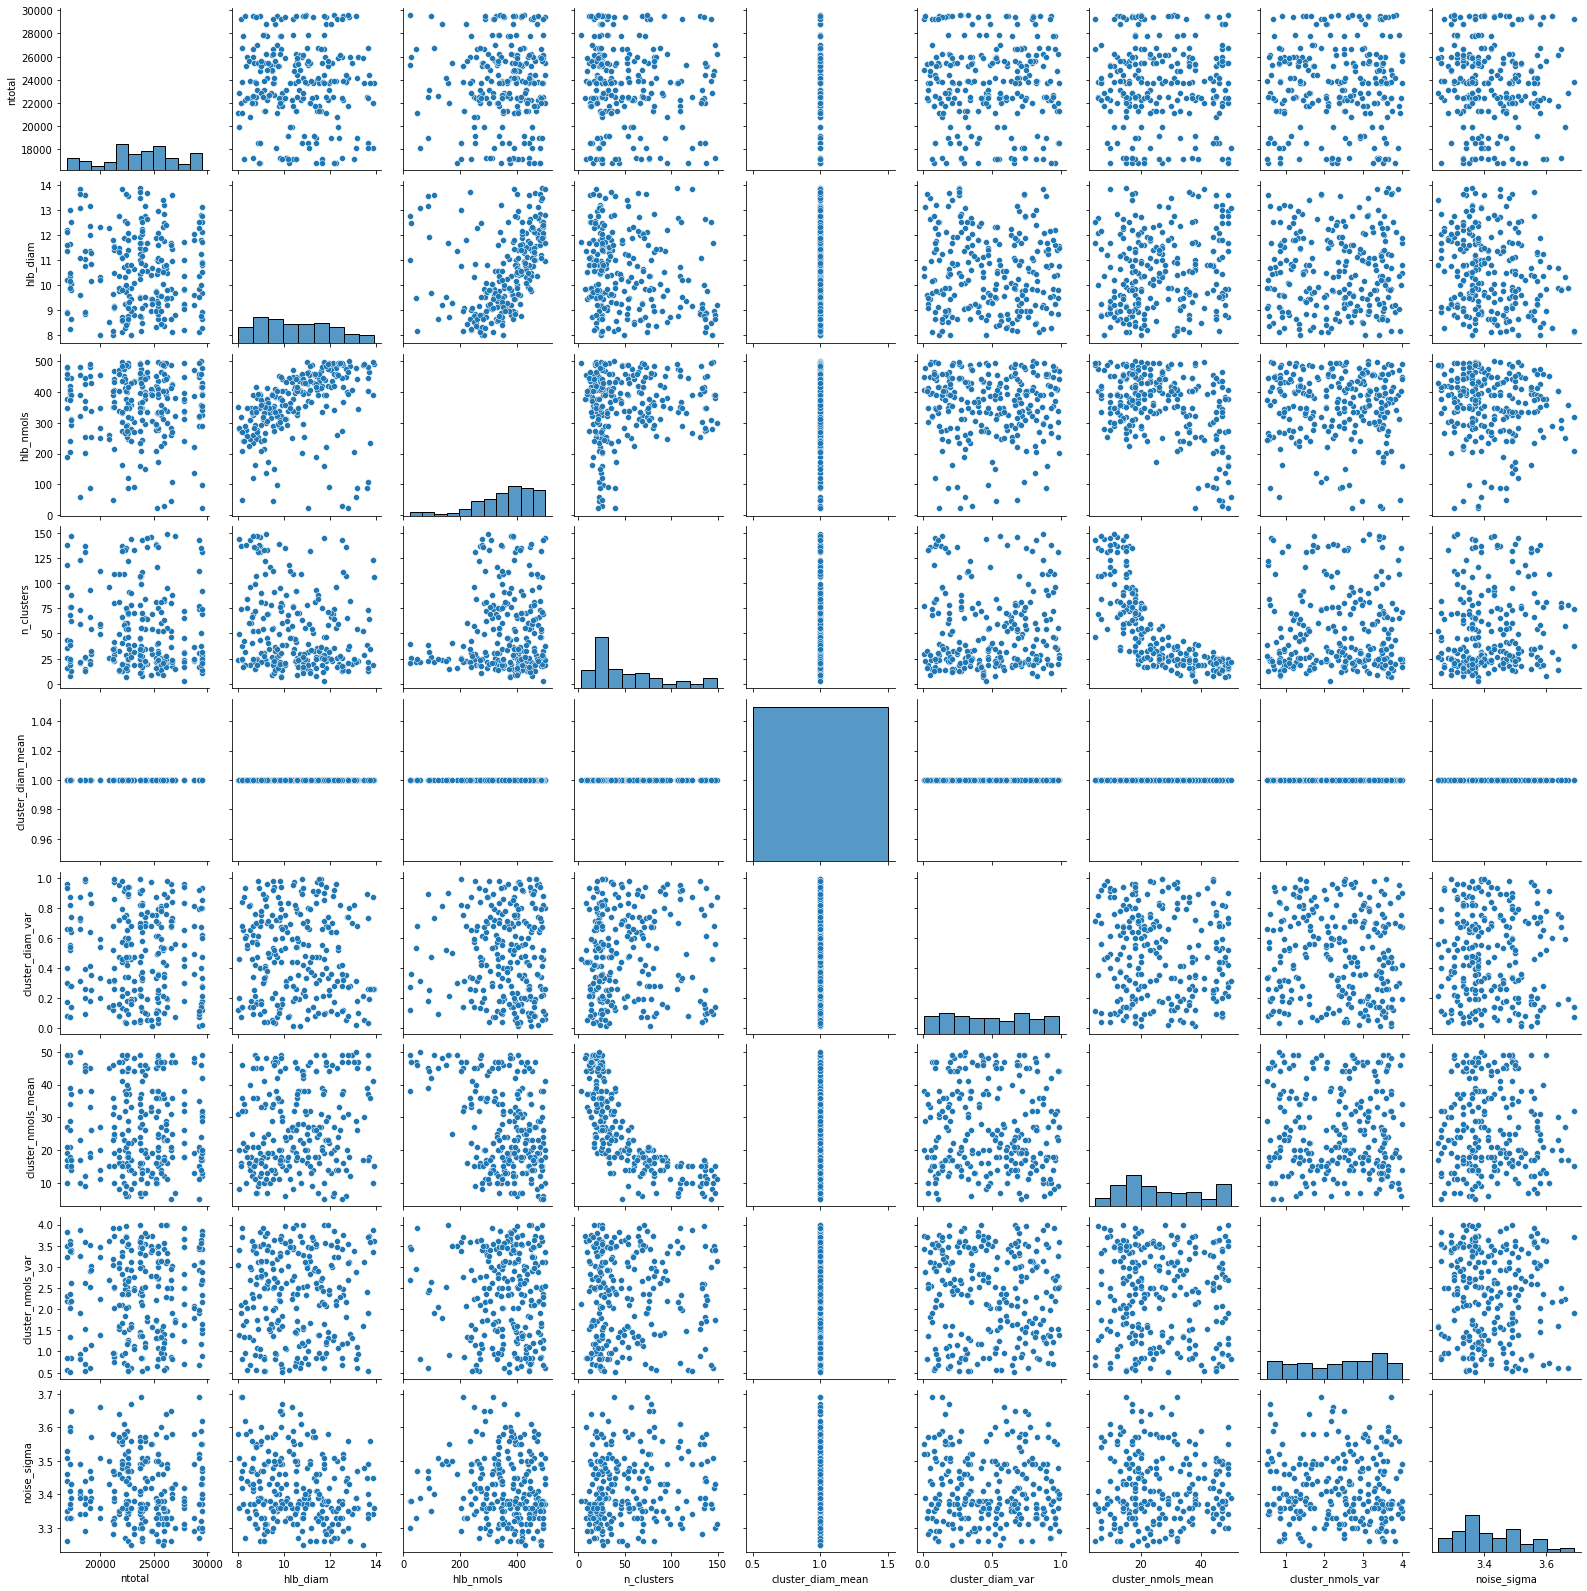

In [17]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-2__realreal__realreal_realsim_20220517_34layer.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-val_pjOKQDXm__checkpoint_final_realreal__realreal_realsim_20220517_34layer.pkl') 

df = make_df(find_in_radius(em1, files1, em2, files2, 0.4))
print(df.shape)
sn.pairplot(df)

0
(461, 9)


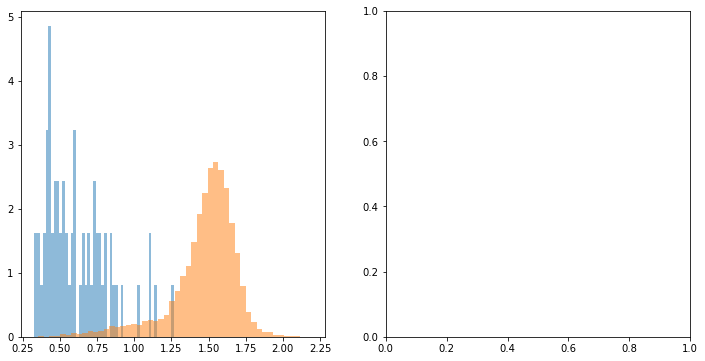

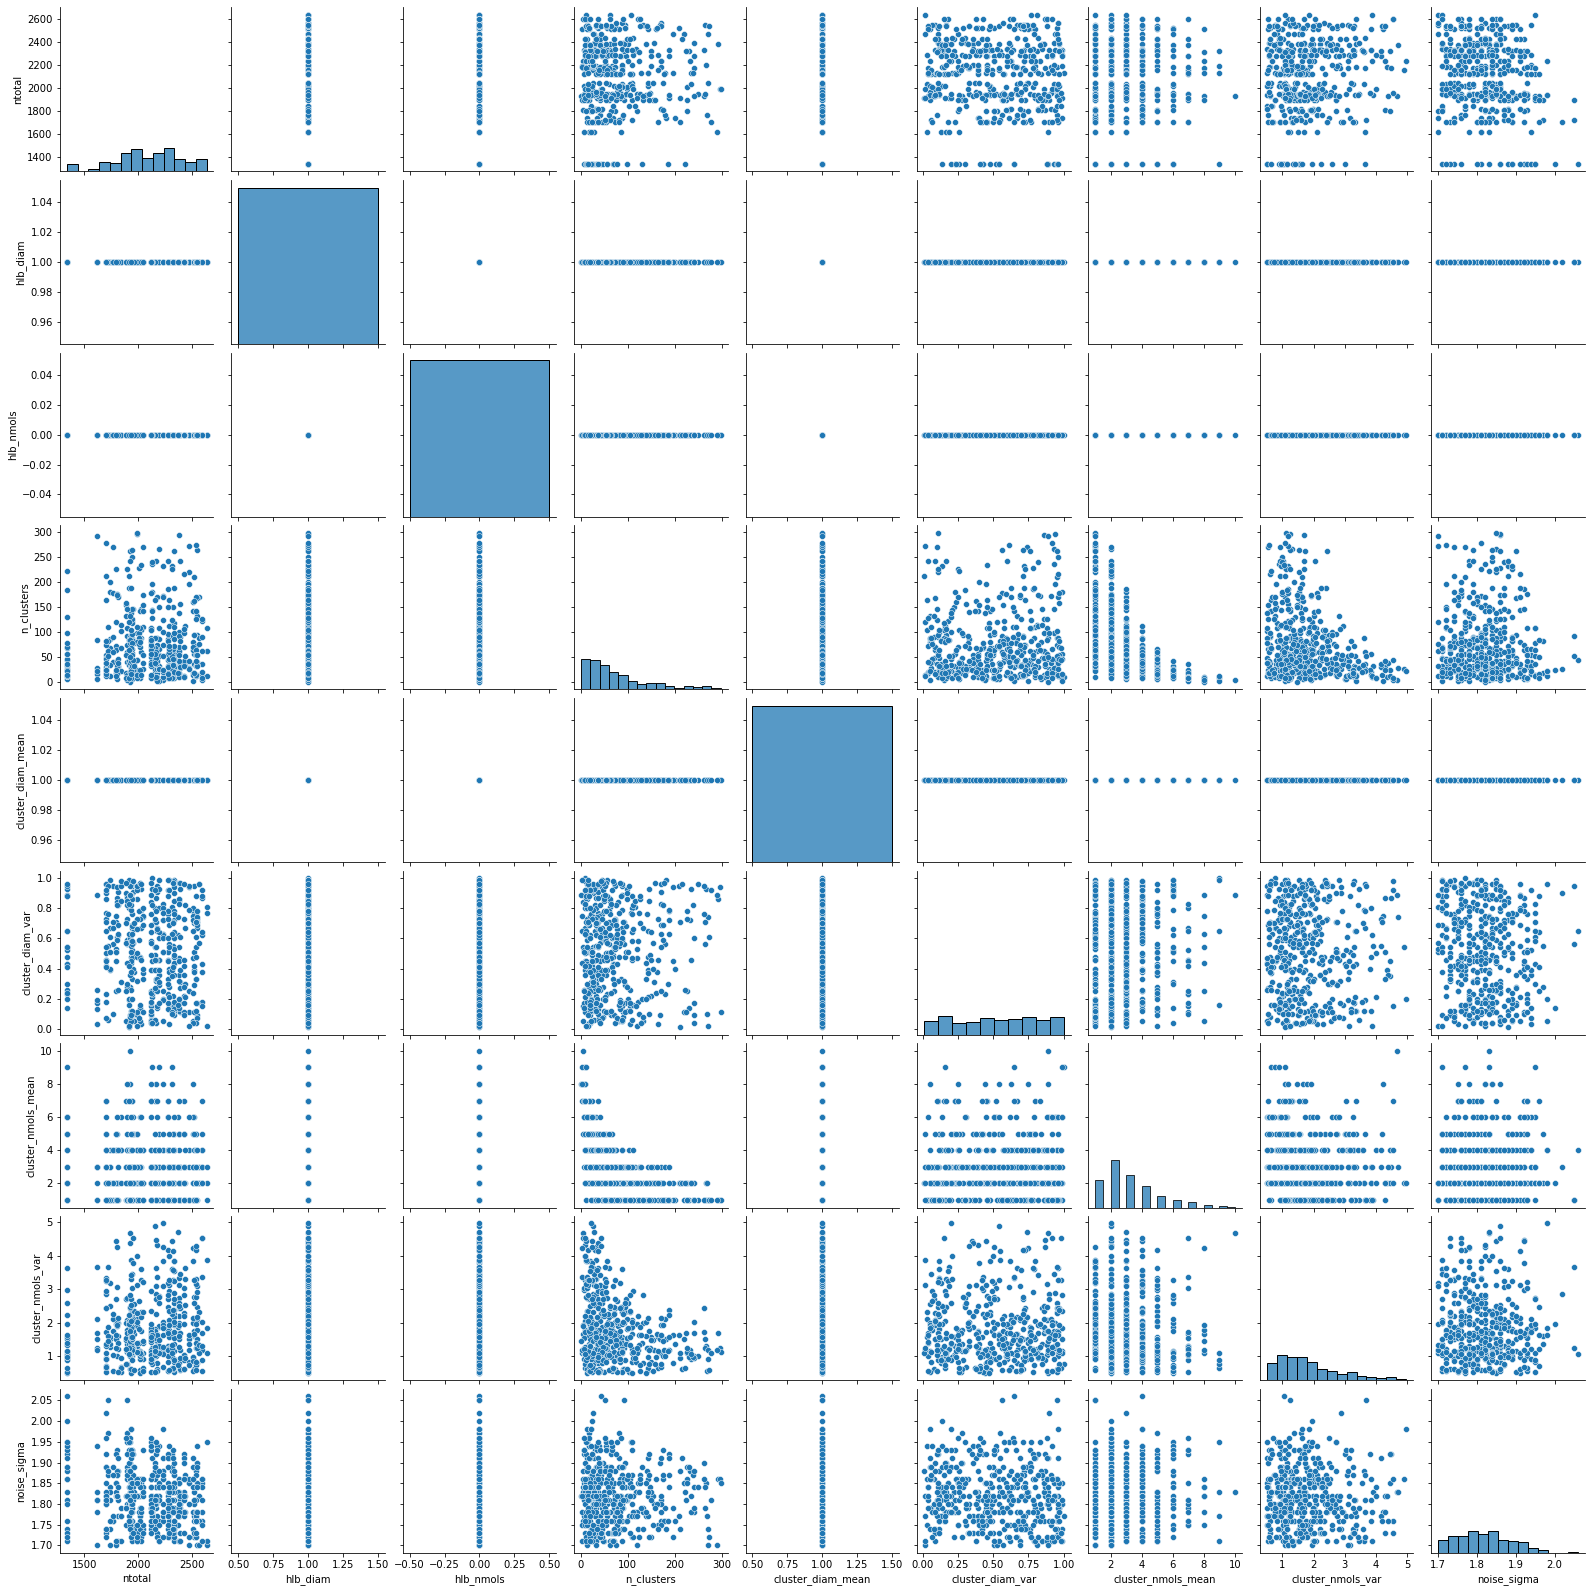

In [19]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-wt-early13__20220601-realreal-simsim__20220529-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-earlync13-val_UjbwPCLC__20220601-realreal-simsim__20220529-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius(em1, files1, em2, files2, 0.6))
print(df.shape)
sn.pairplot(df)

0
(699, 9)


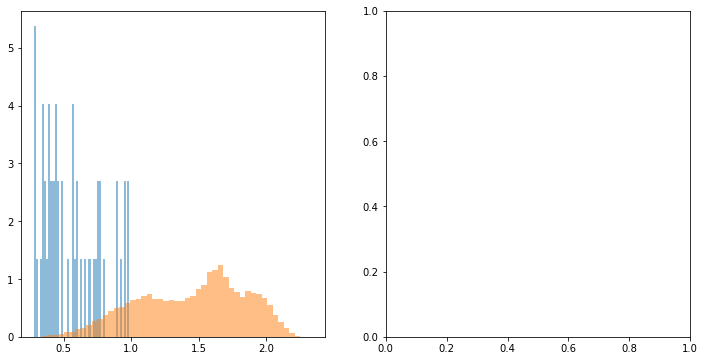

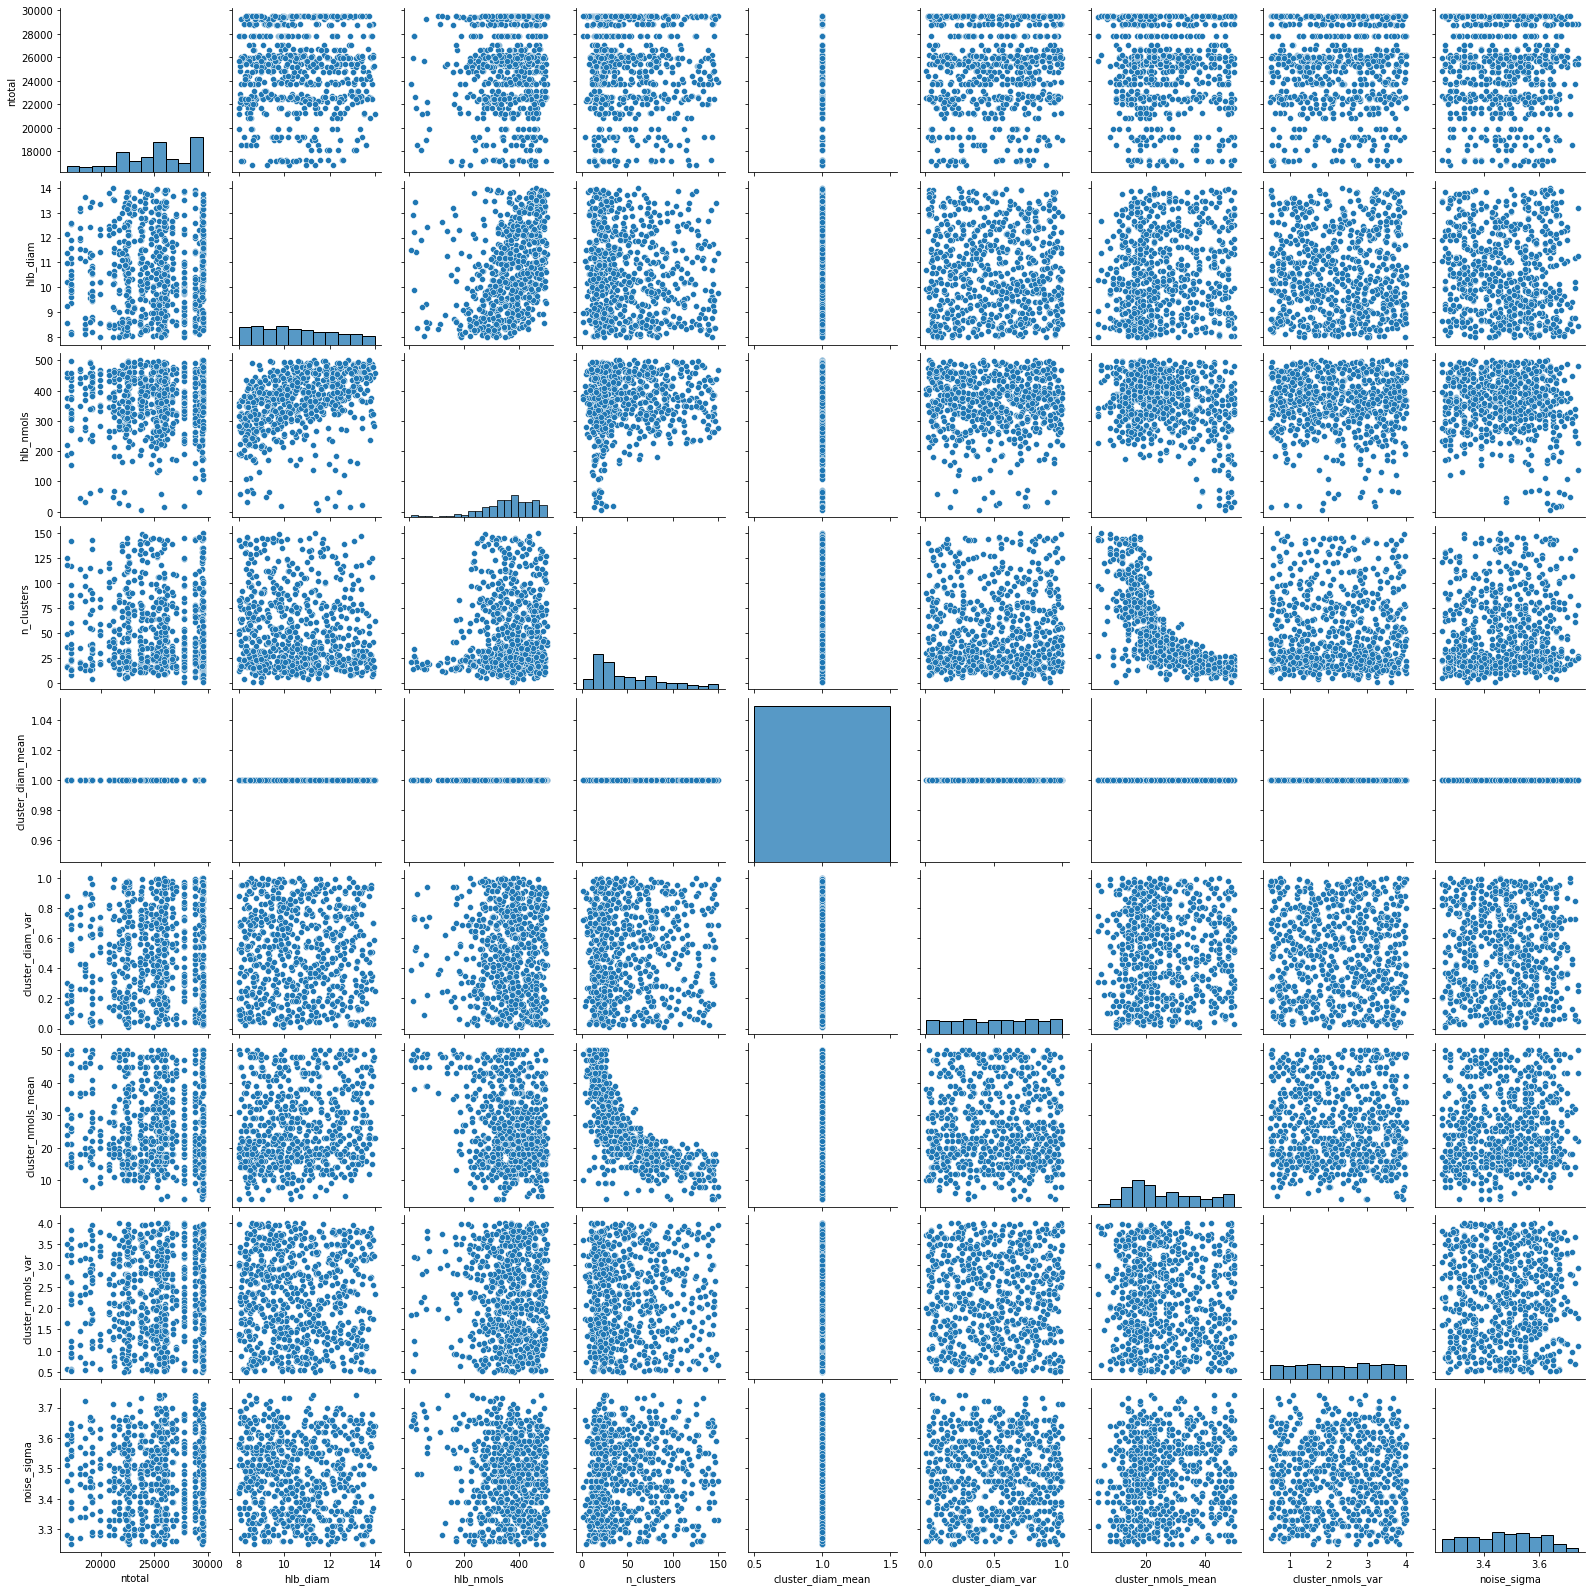

In [21]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-2__20220601-realreal-simsim__20220529-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-val_pjOKQDXm__20220601-realreal-simsim__20220529-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius(em1, files1, em2, files2, 0.5))
print(df.shape)
sn.pairplot(df)

0
(1446, 9)


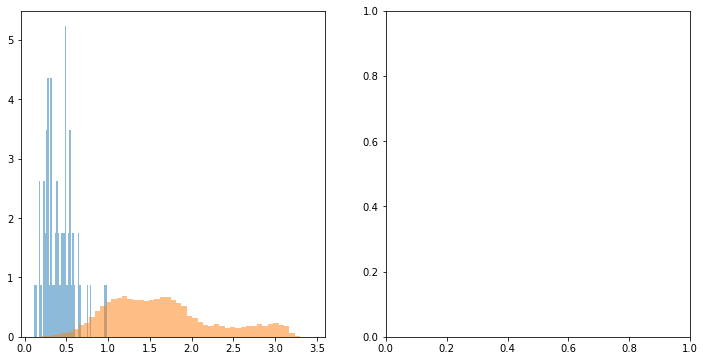

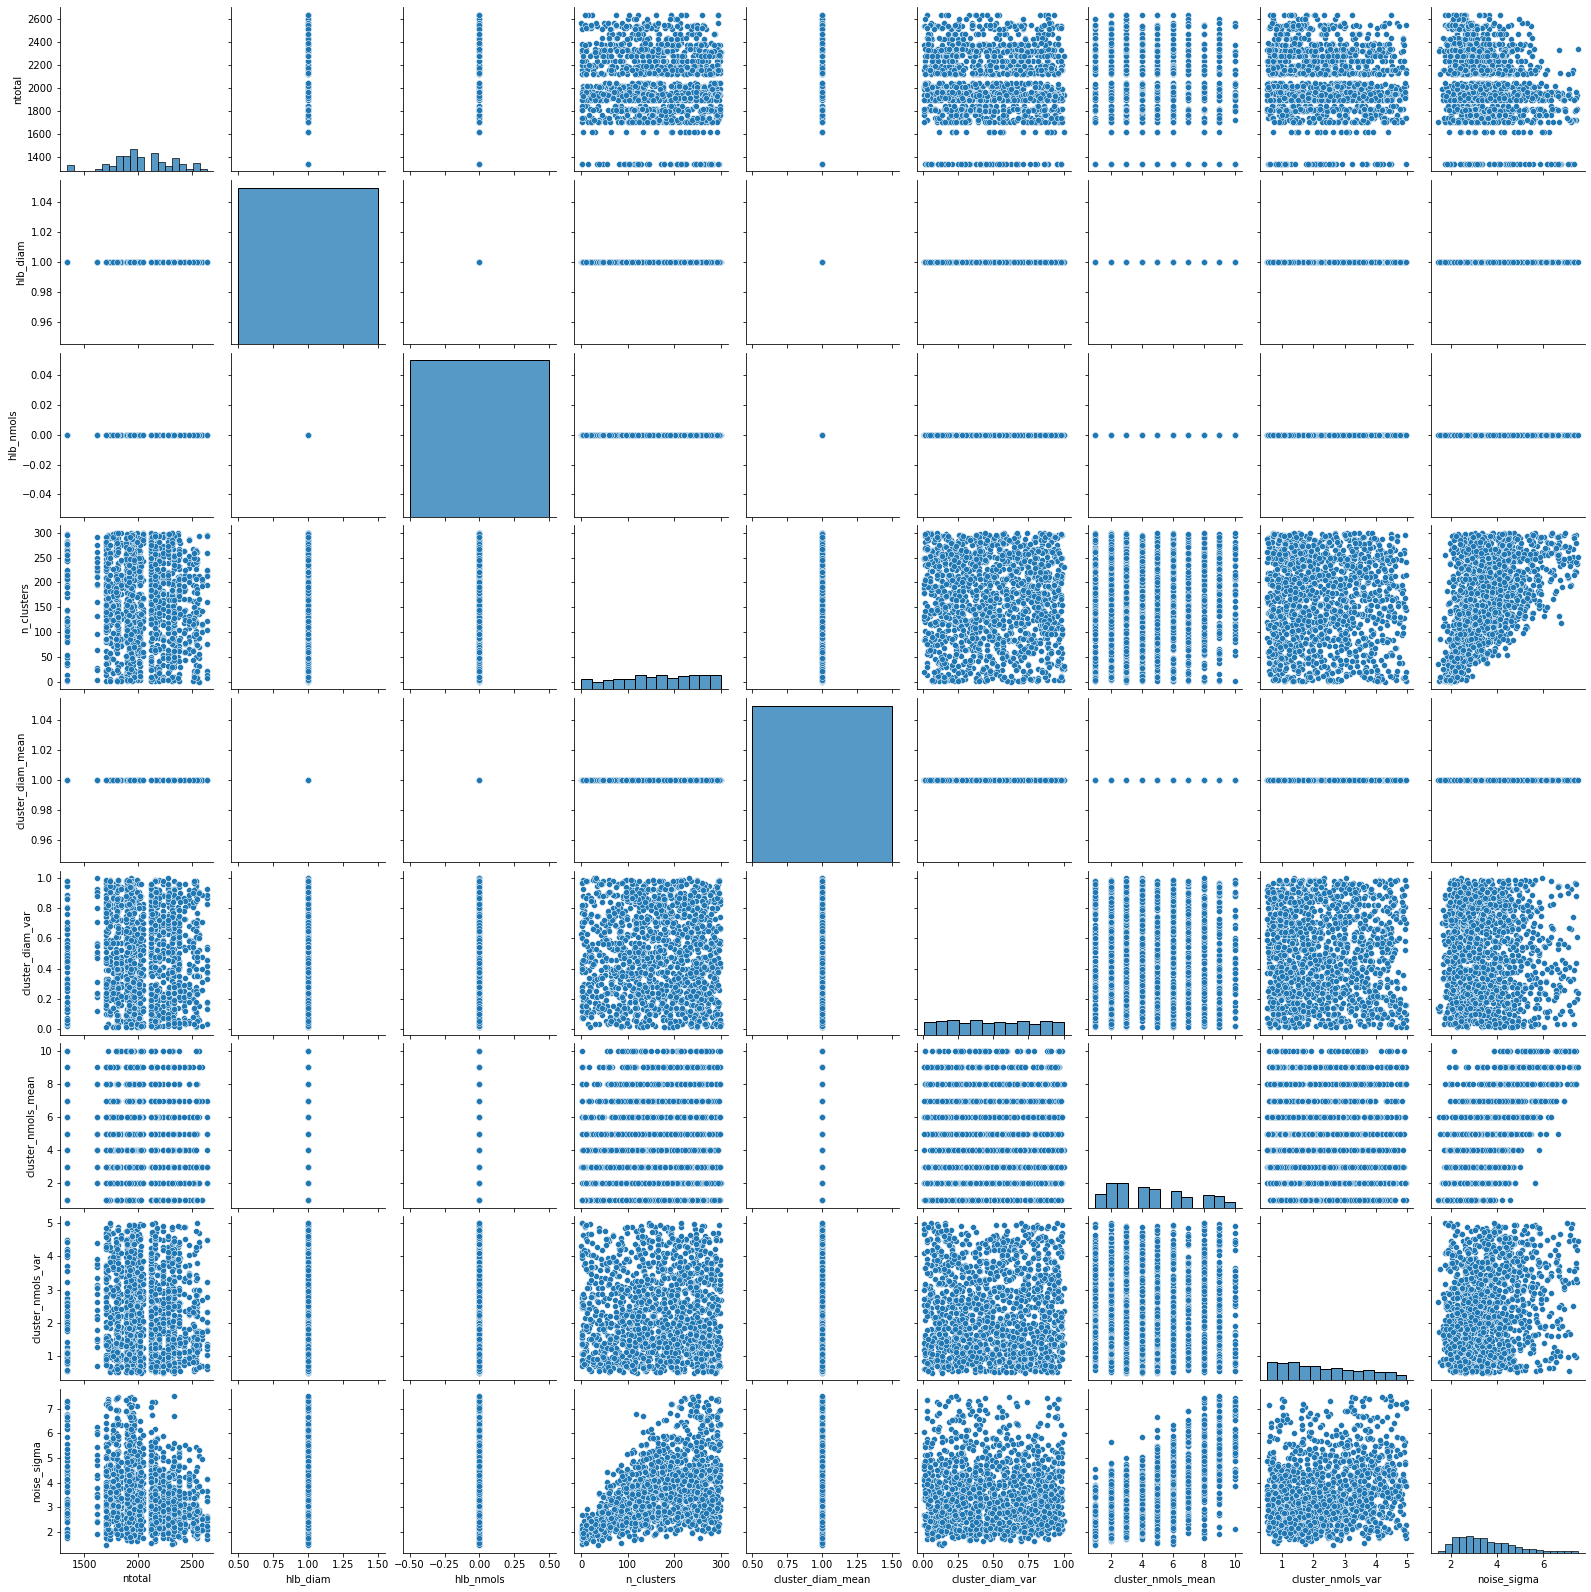

In [47]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-wt-early13__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-earlync13-noisespread_LCWdSVwJ__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius(em1, files1, em2, files2, 0.45))
print(df.shape)
sn.pairplot(df)

0
(49, 9)


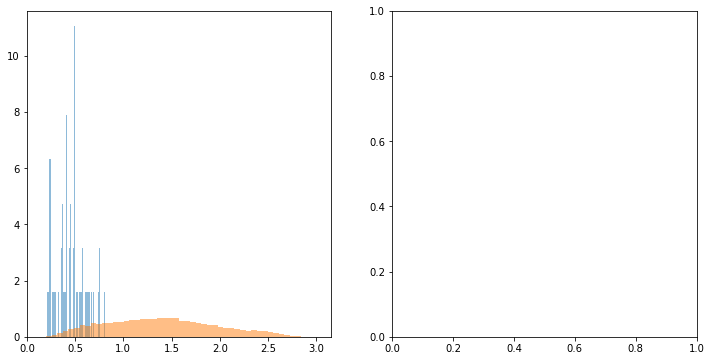

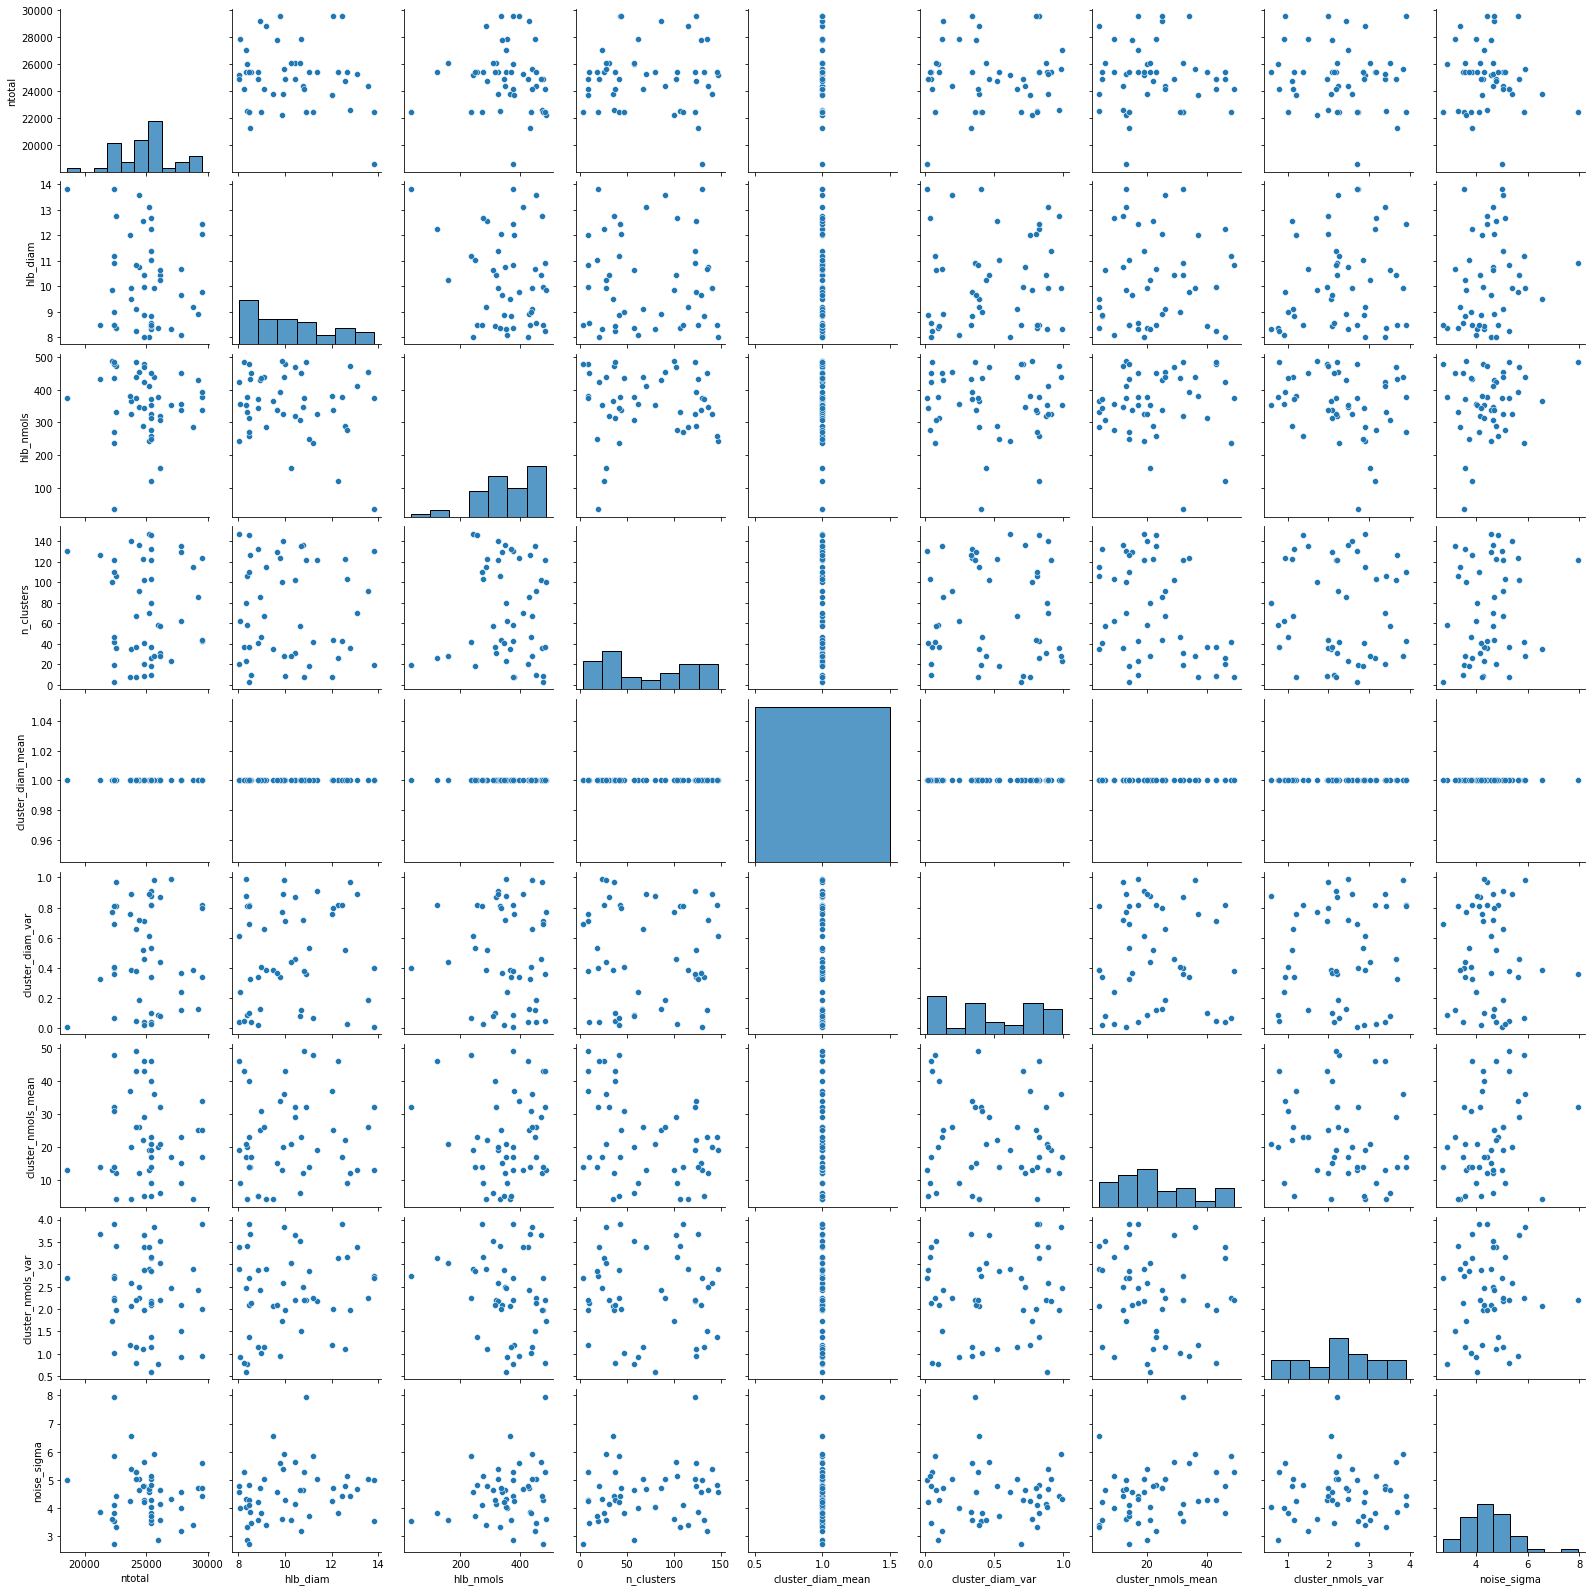

In [50]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-2__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-noisespread_ZEniDQac__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius(em1, files1, em2, files2, 0.5))
print(df.shape)
sn.pairplot(df)

0
(223, 8)


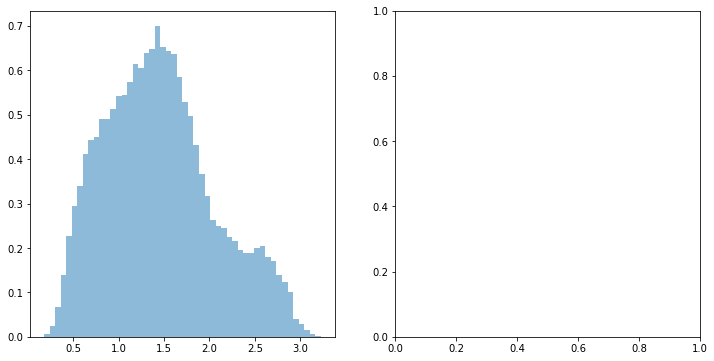

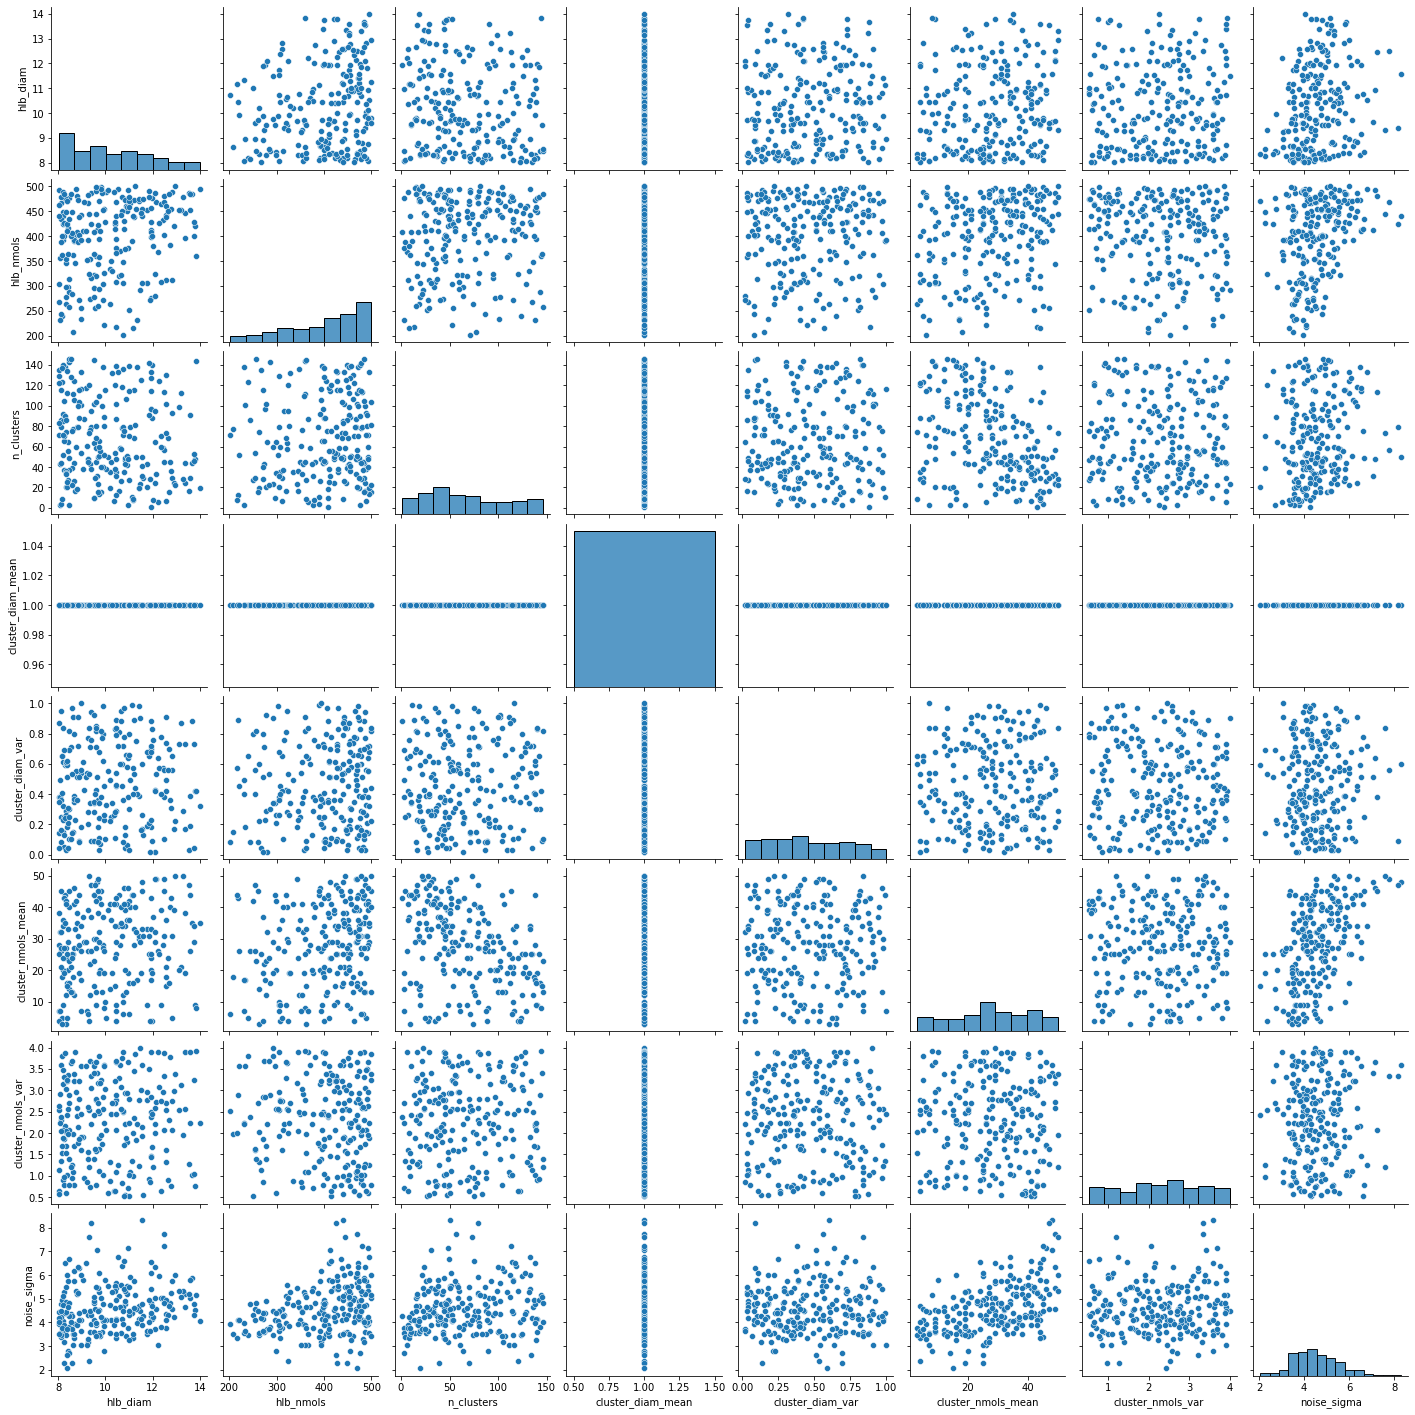

In [28]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-2__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-noisespread_ZEniDQac__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(12,6))
n=15
ax[0].hist(dist_to_center(em1[n:n+1,:], em2), bins=50, alpha=0.5, density=True);


df = make_df(find_in_radius(em1[n:n+1], files1[n:n+1], em2, files2, 0.4))
print(df.shape)
sn.pairplot(df)


In [132]:
def save_embeddings(outfilepath, pkl_files):
    filenames = []
    embeddings = []
    for pkl_file in pkl_files:
        embedding_l, filenames_l = fm.load_pickle(pkl_file)
        filenames = filenames + filenames_l
        embeddings.append(embedding_l)

    embeddings = np.concatenate(embeddings, axis=0)
    np.savetxt(outfilepath + '_embeddings.tsv', embeddings, delimiter='\t')

    with open(outfilepath + '_filenames.tsv', 'w') as filenames_file:
        for f in filenames:
            if f[0] == '.':
                continue
            filenames_file.write(f + '\n')

In [25]:
x = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__rpb1-nc12-mid__20220601-realreal-simsim__20220529-34layer-50x20k.pkl')

In [42]:
save_embeddings('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/tmp/20220612-set3', 
[
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__real-nuclei-set3__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl',
]
)

In [35]:
y.shape

(101, 256)

In [85]:
np.exp(-0.001) ** 50

0.9512294245007155

(878, 8)


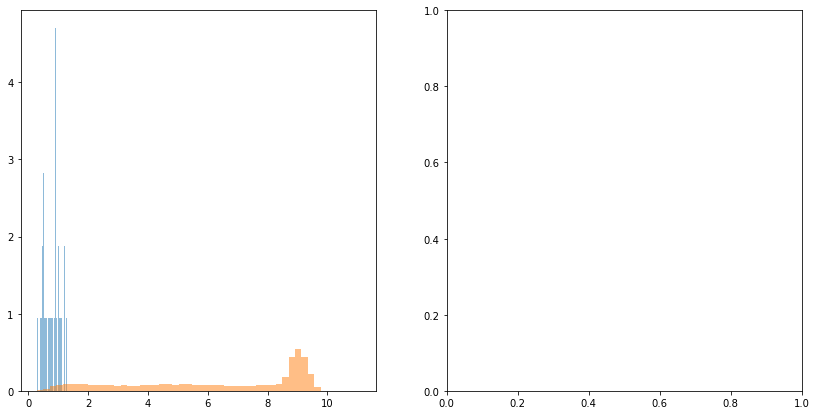

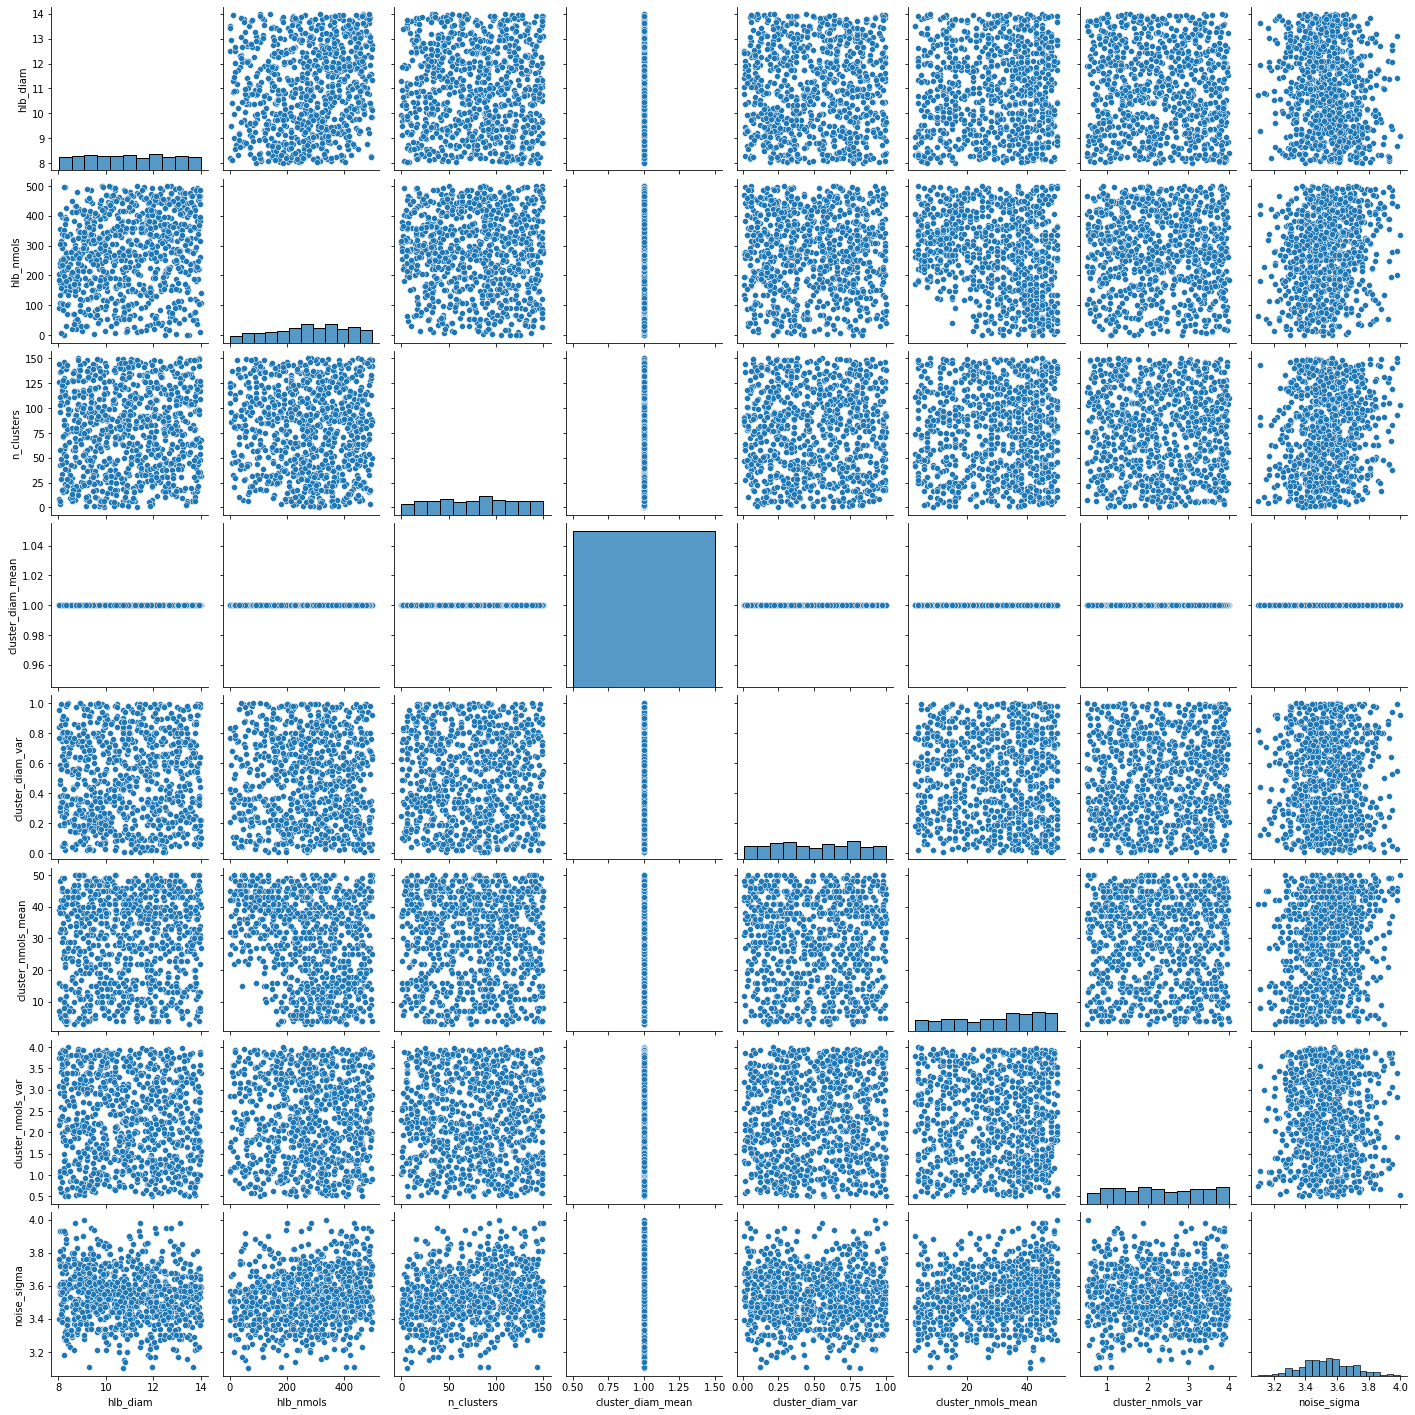

In [27]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/archive/embeddings__rpb1-nc12-2__realreal__20220529-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/archive/embeddings__rpb1-nc12-noisespread_ZEniDQac__realreal__20220529-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(14,7))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1, files1, em2, files2, 1.2))
print(df.shape)
sn.pairplot(df)

In [32]:
l = []
folder = '/Volumes/stad3/temp/zld-nc13-3/zld-nc13-3'
for f in os.listdir(folder):
    if f[0] == '.':
        continue
    l.append(fm.load_pickle(os.path.join(folder, f)))

ims = np.array(l)

(80, 8)


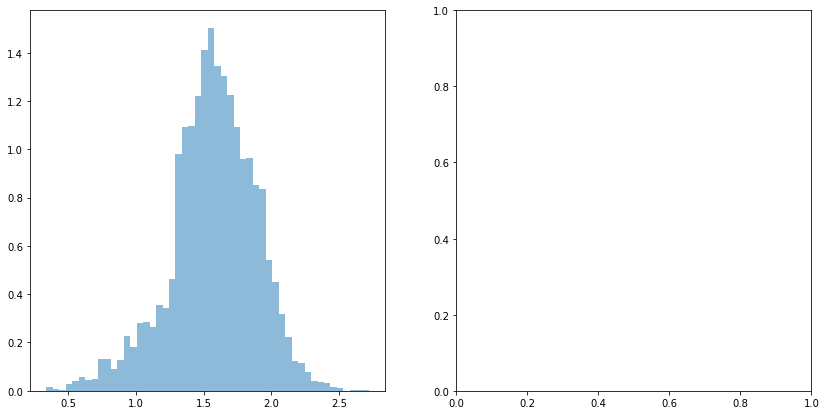

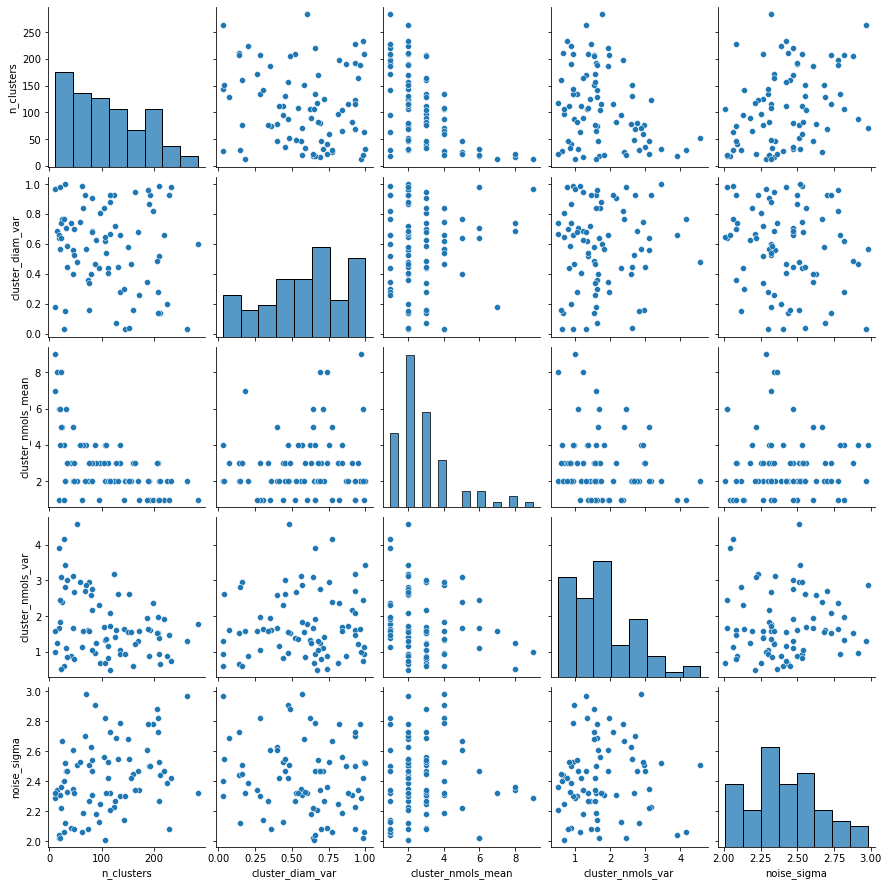

In [88]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-nc13-3__20220612-plus-sims__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__sims-zld-nc13-3-25nM-noise2-4ish_tZwyoAUU__20220612-plus-sims__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(14,7))
row = 2

#ax[0].hist(dist_to_center(em1[row:row+1, :], em1[row:row+1, :]), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1[row:row+1, :], em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1[row:row+1, :], files1, em2, files2, 0.75))
print(df.shape)
sn.pairplot(df[['n_clusters', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma']])

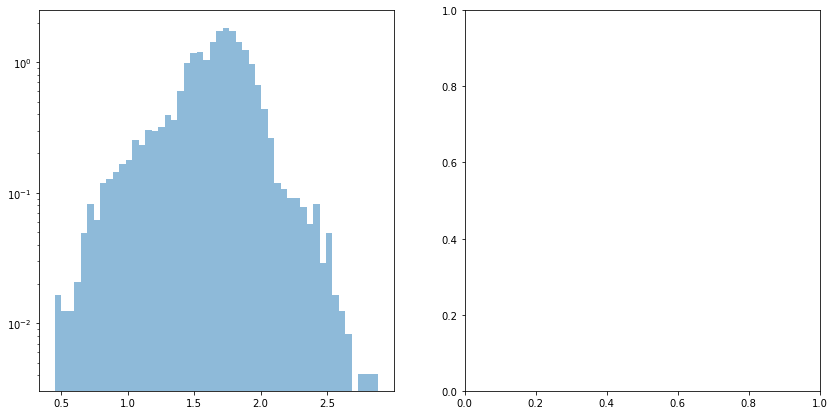

In [103]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-nc13-3__20220612-plus-sims__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__sims-zld-nc13-3-25nM-noise2-4ish_tZwyoAUU__20220612-plus-sims__20220610-60pctmatchedIms-noiseadded-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(14,7))
row = 12

#ax[0].hist(dist_to_center(em1[row:row+1, :], em1[row:row+1, :]), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1[row:row+1, :], em2), bins=50, alpha=0.5, density=True, log=True);


In [108]:
a, b = cn.make_triplet_inputs('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/real_nuclei/set2/zld_filetriplets.csv.gz',10)
ev.visualize_batch(a)

True
True
True


interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'magma', 'cividis', 'inferno',…

(349, 8)


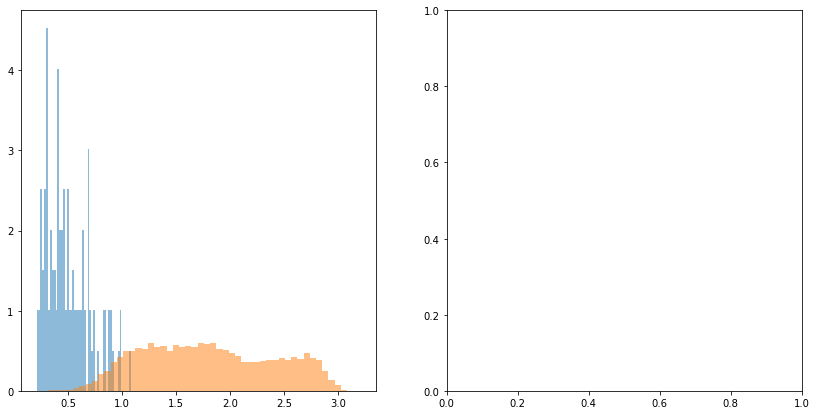

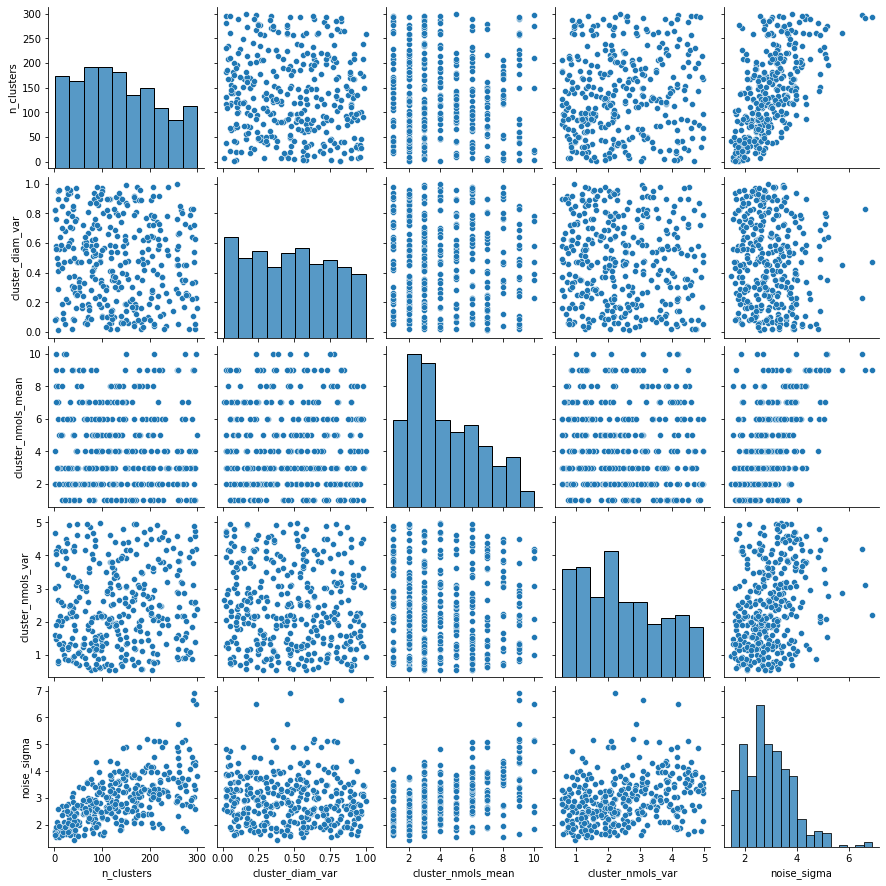

In [112]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-nc13-3__realreal_20220610-60pctmatchedIms-noiseadded-34layer-50x20k') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__sims-zld-nc13-25nM-noisespread-220617_BWdSit__realreal_20220610-60pctmatchedIms-noiseadded-34layer-50x20k') 
fig, ax = plt.subplots(1,2, figsize=(14,7))
row = 2

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1, files1, em2, files2, 0.85))
print(df.shape)
sn.pairplot(df[['n_clusters', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma']])

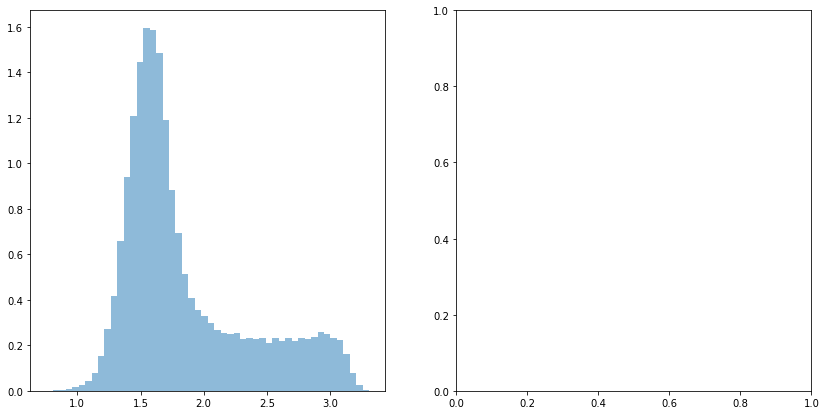

In [130]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-nc13-3__realreal_20220610-60pctmatchedIms-noiseadded-34layer-50x20k') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__sims-zld-nc13-25nM-noise2-4ish_100k_EgdrVRpv__realreal_20220610-60pctmatchedIms-noiseadded-34layer-50x20k') 
fig, ax = plt.subplots(1,2, figsize=(14,7))
row = 1

#ax[0].hist(dist_to_center(em1[row:row+1, :], em1[row:row+1, :]), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1[row:row+1, :], em2), bins=50, alpha=0.5, density=True);

#df = make_df(find_in_radius_center(em1[row:row+1, :], files1, em2, files2, 0.75))
#print(df.shape)
#sn.pairplot(df[['n_clusters', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma']])

(2523, 8)


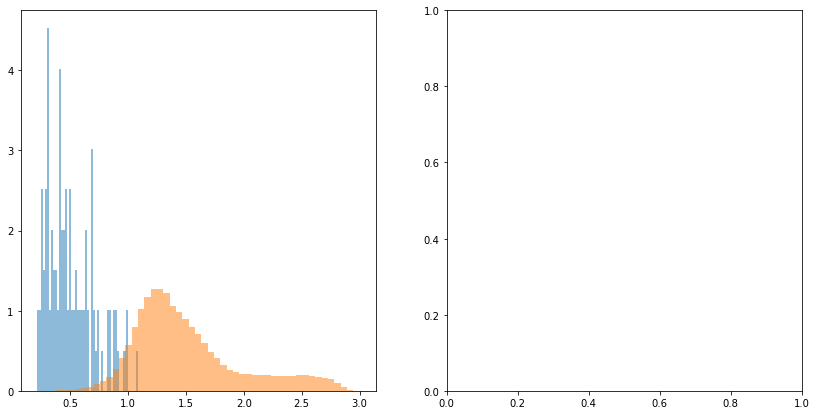

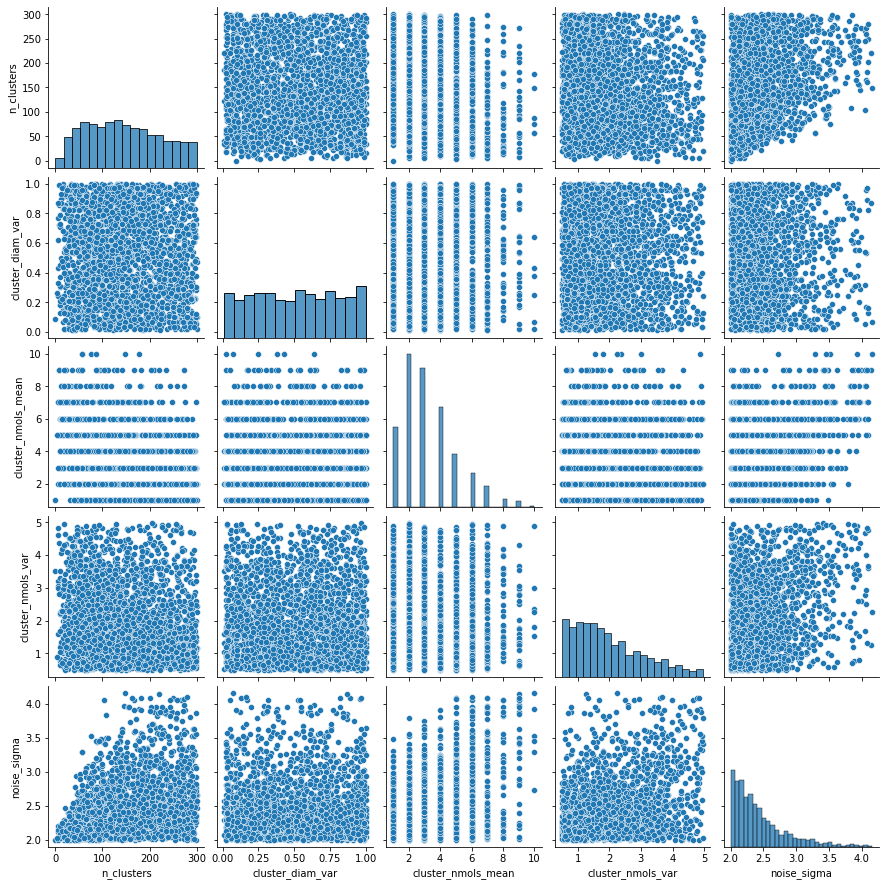

In [131]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-nc13-3__realreal_20220610-60pctmatchedIms-noiseadded-34layer-50x20k') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__sims-zld-nc13-25nM-noise2-4ish_100k_EgdrVRpv__realreal_20220610-60pctmatchedIms-noiseadded-34layer-50x20k') 
fig, ax = plt.subplots(1,2, figsize=(14,7))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1, files1, em2, files2, 0.85))
print(df.shape)
sn.pairplot(df[['n_clusters', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma']])

In [133]:
save_embeddings('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/tmp/set3-matched__realreal-witherosion', ['/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__real-nuclei-set3-matched__20220616-realreal-60pctmatchedIms-34layer-50x20k.pkl'])

(321, 8)


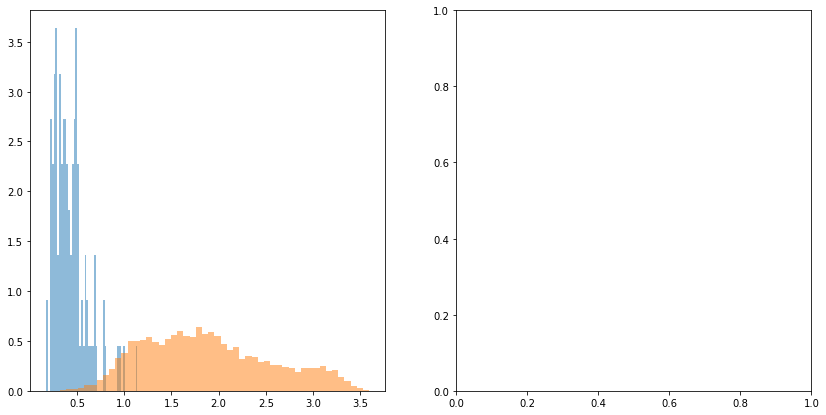

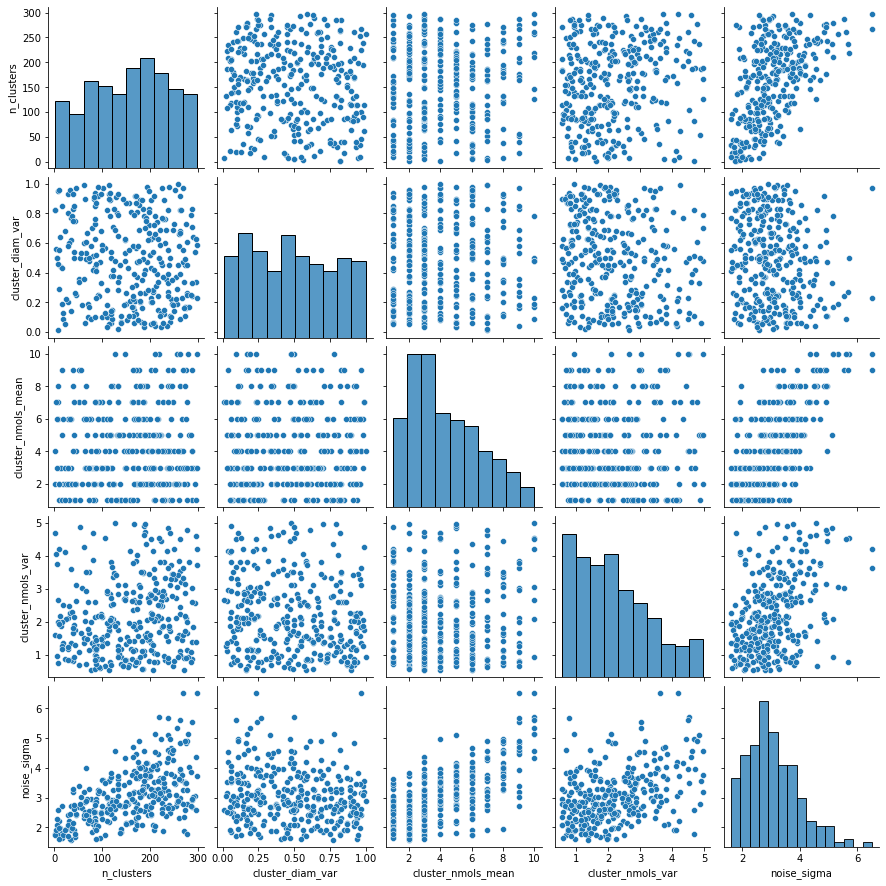

In [134]:
em1, files1 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__zld-nc13-3__20220616-realreal-60pctmatchedIms-34layer-50x20k.pkl') 
em2, files2 = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__sims-zld-nc13-25nM-noisespread-220617_BWdSitlu__20220616-realreal-60pctmatchedIms-34layer-50x20k.pkl') 
fig, ax = plt.subplots(1,2, figsize=(14,7))

ax[0].hist(dist_to_center(em1, em1), bins=50, alpha=0.5, density=True);
ax[0].hist(dist_to_center(em1, em2), bins=50, alpha=0.5, density=True);

df = make_df(find_in_radius_center(em1, files1, em2, files2, 0.85))
print(df.shape)
sn.pairplot(df[['n_clusters', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma']])

In [138]:
i = fm.load_pickle('/Volumes/stad3/real_nuclei_set3/nucs/rpb1/rpb1_20220313-rpb1-gfp-em1-02-0_5_0.pkl')
i.shape

(34, 100, 100)